In [33]:
# Import datasets

import pandas as pd
import numpy as np
from pathlib import Path
import get_reversions as gr
import matplotlib.pyplot as plt


gt = 'Greta Thunberg'
nk = 'Naomi Klein'

# Define the path

path_dataset = Path().cwd().parent / 'oii-fsds-wikipedia-main' / 'DataFrames'

# Import both datasets

greta = pd.read_feather(path_dataset / 'Greta Thunberg.feather')
naomi = pd.read_feather(path_dataset / 'Naomi Klein.feather')

# Add a new column to each DataFrame to indicate the source
greta['environmentalist'] = gt
naomi['environmentalist'] = nk



# Merge both
compared = pd.concat([greta, naomi], axis=0, ignore_index=True)


In [34]:
reversion = gr.get_revisions(compared)

/Users/chicokerche/Library/CloudStorage/OneDrive-Pessoal/10_Oxford/Classes/MT/Fundamental_python/week_2/goup-wikipedia-revisions-project/analysis/get_reversions.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  reversions = df[df['comment'].str.lower().str.contains('(revert(ed)?|undid)', regex=True, na=False)].copy()


/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_14284/746514434.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([greta_data, naomi_data], labels=['Greta Thunberg', 'Naomi Klein'])


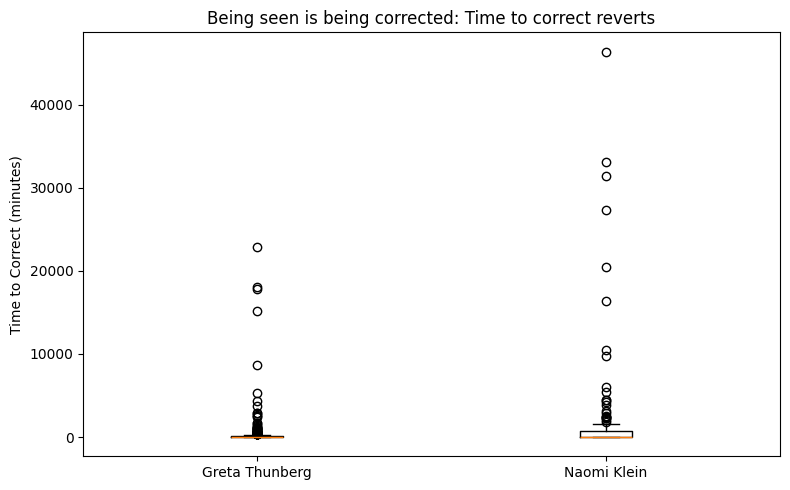

In [35]:
# Prepare data for the boxplot, removing NaN values
greta_data = reversion[reversion['environmentalist'] == gt]['time_to_correct'].dropna().dt.total_seconds() / 60
naomi_data = reversion[reversion['environmentalist'] == nk]['time_to_correct'].dropna().dt.total_seconds() / 60

# Set up the figure and axis for a single boxplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the boxplot with both datasets
ax.boxplot([greta_data, naomi_data], labels=['Greta Thunberg', 'Naomi Klein'])

# Set the title and labels
ax.set_title('Being seen is being corrected: Time to correct reverts')
ax.set_ylabel('Time to Correct (minutes)')

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
reversion.groupby('environmentalist')['time_to_correct'].describe().unstack()

       environmentalist
count  Greta Thunberg                            380
       Naomi Klein                               122
mean   Greta Thunberg      0 days 06:40:47.971052631
       Naomi Klein         1 days 11:39:08.704918032
std    Greta Thunberg      1 days 09:34:52.330182815
       Naomi Klein         4 days 16:38:02.259409128
min    Greta Thunberg                0 days 00:00:01
       Naomi Klein                   0 days 00:00:09
25%    Greta Thunberg                0 days 00:03:00
       Naomi Klein                   0 days 00:05:37
50%    Greta Thunberg                0 days 00:14:37
       Naomi Klein                   0 days 00:32:15
75%    Greta Thunberg         0 days 02:03:29.250000
       Naomi Klein            0 days 11:03:44.250000
max    Greta Thunberg               15 days 21:24:50
       Naomi Klein                  32 days 05:39:27
dtype: object

/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_14284/3676793621.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reversion[reversion['environmentalist'] == gt][["original_pub_time", "revision_id"]].resample('M',
/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_14284/3676793621.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reversion[reversion['environmentalist'] == nk][["original_pub_time", "revision_id"]].resample('M',


Text(0.5, 1.0, 'Monthly Revisions')

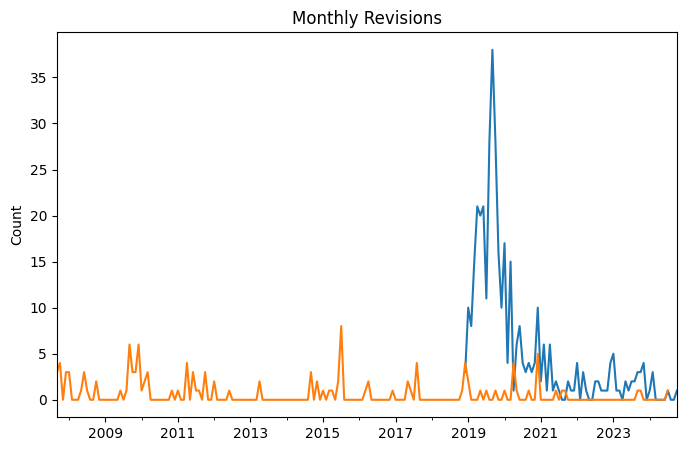

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))

reversion[reversion['environmentalist'] == gt][["original_pub_time", "revision_id"]].resample('M', 
    on="original_pub_time").count().plot(ax=ax,legend=False).set_xlabel(None)
reversion[reversion['environmentalist'] == nk][["original_pub_time", "revision_id"]].resample('M', 
    on="original_pub_time").count().plot(ax=ax,legend=False).set_xlabel(None)
ax.set_ylabel("Count")
ax.set_title("Monthly Revisions") 